### Final Project 

Project Objectives:
The following are the objectives of this project.

1. Importing the required packages. 
2. Reading the csv files.
3. Data Cleaning. 
4. Exploratory Data Analysis on
    - Opportunity Distribution of Top 10 Departments/Agencies.
    - Top Awardees: Distribution of Number of Awards among Top Companies. 
    - Distribution of Posted Opportunities.
5. Hypothesis Testing on 
    - Award Amount Trends Over the Years.
    - There is an increase in number of contract posted for Department of Commerce over the last several years.
    - Census Bureau has the largest dollar amount of contract in Department of Commerce.

### Where is the data source location? 
https://sam.gov/data-services/Contract%20Opportunities/Archived%20Data?privacy=Public

### For this project I will be using 2020,2021,2022 data
1. FY22 https://umbc.box.com/shared/static/tdkmuj86qm2uxhvjlfkav2i3pnx9fkoa.csv

2. FY21 https://umbc.box.com/shared/static/7emabgf9ck2afprmrl459jnk30ewmabj.csv

3. FY20 https://umbc.box.com/shared/static/91lmieun5u1e8p87wmlnuglyzl3xm91h.csv

### 1. Importing the required packages

In [1]:
import pandas as pd
from io import StringIO
import requests
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from datetime import datetime
from scipy.stats import f_oneway #Used for statistical testing

### 2. Reading the csv files from the provided URL.

#### 2.1 Reading 2020 data and storing it in FY20_Contract DataFrame. 

In [2]:
url = requests.get('https://umbc.box.com/shared/static/91lmieun5u1e8p87wmlnuglyzl3xm91h.csv').text #sending the HTTP request to the url.
csv_raw = StringIO(url) #Create a StringIO object to treat the CSV content as a file-like object.
FY20_Contract = pd.read_csv(csv_raw, low_memory=False) #Read the CSV content into a pandas DataFrame, low_memory=False parameter suppresses a warning for large datasets

In [3]:
FY20_Contract.head() #printing the first 5 rows

,NoticeId,Title,Sol#,Department/Ind.Agency,CGAC,Sub-Tier,FPDS Code,Office,AAC Code,PostedDate,...,SecondaryContactPhone,SecondaryContactFax,OrganizationType,State,City,ZipCode,CountryCode,AdditionalInfoLink,Link,Description
0,425a9edc53e84373aeb2826644ac97b6,66--Airfield Friction Tester,W50S9C-20-Q-0003,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,W7N4 USPFO ACTIVITY VT ARNG,W912LN,2020-09-30 23:57:23.594-04,...,NaN,NaN,OFFICE,VT,COLCHESTER,05446-3099,USA,NaN,https://sam.gov/opp/425a9edc53e84373aeb2826644...,NaN
1,cbdb7b8ee8de4179b25c36e3b4819a2c,65--COVID 19 cleaning supplies,1018031080_01,"STATE, DEPARTMENT OF",19.0,"STATE, DEPARTMENT OF",1900,ACQUISITIONS - AQM MOMENTUM,19AQMM,2020-09-30 23:53:02.228-04,...,NaN,NaN,OFFICE,DC,WASHINGTON,20520,USA,NaN,https://sam.gov/opp/cbdb7b8ee8de4179b25c36e3b4...,NaN
2,c8609373b0734f1aa5d9dcdf7e26f4c6,58--Voyager DSV,1019022491_01,"STATE, DEPARTMENT OF",19.0,"STATE, DEPARTMENT OF",1900,ACQUISITIONS - AQM MOMENTUM,19AQMM,2020-09-30 23:48:57.306-04,...,NaN,NaN,OFFICE,DC,WASHINGTON,20520,USA,NaN,https://sam.gov/opp/c8609373b0734f1aa5d9dcdf7e...,NaN
3,c07957305b754b35957e539f98150dcf,Contract Opportunity Lease of Office Space wit...,20-REG11_8VA2699,GENERAL SERVICES ADMINISTRATION,47.0,PUBLIC BUILDINGS SERVICE,4740,PBS R11 LEASING DIV,47PM99,2020-09-30 23:45:27.966-04,...,2027086511,NaN,OFFICE,DC,WASHINGTON,20407,USA,NaN,https://sam.gov/opp/c07957305b754b35957e539f98...,This advertisement is hereby incorporated into...
4,50463c77de6c4ebdbd7f1e8be833f4fb,6540-- VISN 5 Eyeglass Contract,36C24520R0012,"VETERANS AFFAIRS, DEPARTMENT OF",36.0,"VETERANS AFFAIRS, DEPARTMENT OF",3600,245-NETWORK CONTRACT OFFICE 5 (36C245),36C245,2020-09-30 23:43:15.213-04,...,NaN,NaN,OFFICE,MD,LINTHICUM,21090,USA,NaN,https://sam.gov/opp/50463c77de6c4ebdbd7f1e8be8...,PRESOLICITATION NOTICE This is a pre-solicitat...


#### 2.2 Reading 2021 data and storing it in FY21_Contract DataFrame. 

In [4]:
url = requests.get('https://umbc.box.com/shared/static/7emabgf9ck2afprmrl459jnk30ewmabj.csv').text #sending the HTTP request to the url.
csv_raw = StringIO(url) #Create a StringIO object to treat the CSV content as a file-like object.
FY21_Contract = pd.read_csv(csv_raw, low_memory=False) #Read the CSV content into a pandas DataFrame, low_memory=False parameter suppresses a warning for large datasets.

In [5]:
FY21_Contract.head()#printing the top 5 rows

,NoticeId,Title,Sol#,Department/Ind.Agency,CGAC,Sub-Tier,FPDS Code,Office,AAC Code,PostedDate,...,SecondaryContactPhone,SecondaryContactFax,OrganizationType,State,City,ZipCode,CountryCode,AdditionalInfoLink,Link,Description
0,b21b71fa248b4cb7a845554fbdccfb3f,89--FCI Phoenix - Q1 FY22 Religious Meal Menu,15B60822Q00000001_01,"JUSTICE, DEPARTMENT OF",15.0,FEDERAL PRISON SYSTEM / BUREAU OF PRISONS,1540,FCI PHOENIX,15B608,2021-09-30 23:58:49.215-04,...,NaN,NaN,OFFICE,AZ,PHOENIX,85086,USA,NaN,https://sam.gov/opp/b21b71fa248b4cb7a845554fbd...,Award Notice
1,6b83d00cea8f401480dabbbccddb8ae0,Growth Chamber - Award Notice,12505B21Q0220-Award,"AGRICULTURE, DEPARTMENT OF",12.0,AGRICULTURAL RESEARCH SERVICE,12H2,USDA ARS MWA AAO ACQ/PER PROP,12505B,2021-09-30 23:58:03.26-04,...,NaN,NaN,OFFICE,IL,PEORIA,61604,USA,NaN,https://sam.gov/opp/6b83d00cea8f401480dabbbccd...,NaN
2,7523c6a91efd4924a18849cd69e05143,Microplate Reader Spectrophotometer - Award No...,12505B21Q0191-Award,"AGRICULTURE, DEPARTMENT OF",12.0,AGRICULTURAL RESEARCH SERVICE,12H2,USDA ARS MWA AAO ACQ/PER PROP,12505B,2021-09-30 23:55:25.523-04,...,NaN,NaN,OFFICE,IL,PEORIA,61604,USA,NaN,https://sam.gov/opp/7523c6a91efd4924a18849cd69...,NaN
3,6d51e36bd72f41dd9bb24d9f2314afad,37--Grounds Mower,W50S84-21-Q-0010,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,W7NF USPFO ACTIVITY MI ARNG,W912JB,2021-09-30 23:52:54.99-04,...,NaN,NaN,OFFICE,MI,LANSING,48906-2934,USA,NaN,https://sam.gov/opp/6d51e36bd72f41dd9bb24d9f23...,Award Notice
4,b99b1ddaad6c4b27b1e3e49e22be8d76,Drone with Imager and Camera - Award Notice,12505B21Q0188-Award,"AGRICULTURE, DEPARTMENT OF",12.0,AGRICULTURAL RESEARCH SERVICE,12H2,USDA ARS MWA AAO ACQ/PER PROP,12505B,2021-09-30 23:52:31.969-04,...,NaN,NaN,OFFICE,IL,PEORIA,61604,USA,NaN,https://sam.gov/opp/b99b1ddaad6c4b27b1e3e49e22...,NaN


#### 2.3 Reading 2022 data and storing it in FY22_Contract DataFrame. 

In [6]:
url = requests.get('https://umbc.box.com/shared/static/tdkmuj86qm2uxhvjlfkav2i3pnx9fkoa.csv').text #sending the HTTP request to the url.
csv_raw = StringIO(url) #Create a StringIO object to treat the CSV content as a file-like object.
FY22_Contract = pd.read_csv(csv_raw, low_memory=False) #Read the CSV content into a pandas DataFrame, low_memory=False parameter suppresses a warning for large datasets.

In [7]:
FY22_Contract.head() #printing the top 5 rows

,NoticeId,Title,Sol#,Department/Ind.Agency,CGAC,Sub-Tier,FPDS Code,Office,AAC Code,PostedDate,...,SecondaryContactPhone,SecondaryContactFax,OrganizationType,State,City,ZipCode,CountryCode,AdditionalInfoLink,Link,Description
0,97ec6ab3d5d4454192a8828827de6f2f,Whooster Web-Based Software,HQ003422P0171,DEPT OF DEFENSE,97.0,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-09-30 23:09:21.289-04,...,NaN,NaN,OFFICE,DC,WASHINGTON,203011000,USA,NaN,https://sam.gov/opp/97ec6ab3d5d4454192a8828827...,The Whooster Web Based Software contract is a ...
1,c15a7148317b44eeac210a7b64068765,Beckman Coulter Reagents and Supplies for Gove...,W81K0222Q0162,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,W40M RHCO PACIFIC,W81K02,2022-09-30 23:01:45.502-04,...,NaN,NaN,OFFICE,HI,FORT SHAFTER,96858-5098,USA,NaN,https://sam.gov/opp/c15a7148317b44eeac210a7b64...,The Medical Readiness Contracting Office  Pac...
2,e52f4a998e1d4ec4bc8f507f3ddaacd4,"USACE-SPK -DBB - Folsom Main, Left Wing and Ri...",W9123822R0055,DEPT OF DEFENSE,21.0,DEPT OF THE ARMY,2100,US ARMY ENGINEER DISTRICT SACRAMENT,W91238,2022-09-30 22:44:29.969-04,...,NaN,NaN,OFFICE,CA,SACRAMENTO,95814-2922,USA,NaN,https://sam.gov/opp/e52f4a998e1d4ec4bc8f507f3d...,The Folsom Dam Raise Project is a Flood Risk M...
3,031b2345baee4b89a8782e116b09d3dd,A Solicitation of the National Institutes of H...,PHS-2023-1,"HEALTH AND HUMAN SERVICES, DEPARTMENT OF",75.0,NATIONAL INSTITUTES OF HEALTH,7529,NATIONAL INSTITUTES OF HEALTH NIAID,75N930,2022-09-30 22:35:59.258-04,...,NaN,NaN,OFFICE,MD,BETHESDA,20892,USA,NaN,https://sam.gov/opp/031b2345baee4b89a8782e116b...,The National Institutes of Health (NIH) and th...
4,bf103afa7b4b455bb1541eb450e38128,8(a) WebEOC IL5 Cloud Services and IT Support,HQ003422C0130,DEPT OF DEFENSE,97.0,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-09-30 22:12:14.082-04,...,NaN,NaN,OFFICE,DC,WASHINGTON,203011000,USA,NaN,https://sam.gov/opp/bf103afa7b4b455bb1541eb450...,Direct Award of an 8(a) contract for WebEOC IL...


### 3. Concatinating the dataframes

In [8]:
Dataframes = [FY20_Contract, FY21_Contract, FY22_Contract] # assingning the dataframes to the variable data.

In [9]:
Combined_df = pd.concat(Dataframes) #This dataframe now has all 3 years data.

### 4. Information about the Dataset

In [10]:
Combined_df.shape #Rows and columns of dataset

(1063895, 47)

In [11]:
Combined_df.info() #Datatype of the data

<class 'pandas.core.frame.DataFrame'>
Index: 1063895 entries, 0 to 341591
Data columns (total 47 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   NoticeId                  1063895 non-null  object 
 1   Title                     1063892 non-null  object 
 2   Sol#                      1054667 non-null  object 
 3   Department/Ind.Agency     1049506 non-null  object 
 4   CGAC                      1049506 non-null  float64
 5   Sub-Tier                  1048421 non-null  object 
 6   FPDS Code                 1049401 non-null  object 
 7   Office                    1049464 non-null  object 
 8   AAC Code                  1042277 non-null  object 
 9   PostedDate                1063895 non-null  object 
 10  Type                      1063895 non-null  object 
 11  BaseType                  1063894 non-null  object 
 12  ArchiveType               1063895 non-null  object 
 13  ArchiveDate               1025056

In [12]:
Combined_df.isnull().sum() #Checking for null values. 

NoticeId                          0
Title                             3
Sol#                           9228
Department/Ind.Agency         14389
CGAC                          14389
Sub-Tier                      15474
FPDS Code                     14494
Office                        14431
AAC Code                      21618
PostedDate                        0
Type                              0
BaseType                          1
ArchiveType                       0
ArchiveDate                   38839
SetASideCode                 672070
SetASide                     672070
ResponseDeadLine             242717
NaicsCode                     56615
ClassificationCode            33872
PopStreetAddress             981013
PopCity                      683084
PopState                     680531
PopZip                       693689
PopCountry                   587592
Active                            0
AwardNumber                  843832
AwardDate                    844831
Award$                      

### 5. Cleaning the Data

#### Handling missing values in Department/Ind.Agency

 - Since the missing values account for approximately 1.35% of the total rows. We will be handling the missing values by using mode of this column. 

In [13]:
mode_of_department = Combined_df['Department/Ind.Agency'].mode()[0] #The .mode() function returns a pandas series containing the mode(s) of the specified column. In this case, [0] is used to access the first mode in case there are multiple modes.
Combined_df['Department/Ind.Agency'].fillna(mode_of_department, inplace=True) #The .fillna() method is used for filling missing (NaN) values in the specified column. The inplace=True parameter means that the changes are made directly to the dataframe.

#### Handling missing values in BaseType
- We only have 1 missing value in Base Type, therefore we are filling it with mode. 

In [14]:
mode_of_base_type = Combined_df['BaseType'].mode()[0] #The .mode() function returns a pandas series containing the mode(s) of the specified column. 
Combined_df['BaseType'].fillna(mode_of_base_type, inplace=True) #The .fillna() method is used for filling missing (NaN) values in the specified column. The inplace=True parameter means that the changes are made directly to the dataframe.

#### Handling missing values in PopCity, PopState, PopZip, PopCountry
- We will be filling this data with a placeholder 'Unknown' in order to handle missing values.

In [15]:
 #The .fillna() method is used for filling missing values with 'Unknown' in the specified column. The inplace=True parameter means that the changes are made directly to the dataframe.
Combined_df['PopCity'].fillna('Unknown', inplace=True)
Combined_df['PopState'].fillna('Unknown', inplace=True)
Combined_df['PopZip'].fillna('Unknown', inplace=True)
Combined_df['PopCountry'].fillna('Unknown', inplace=True)

#### Handling missing values in OrganizationType
 - Since the missing values account for approximately 1.35% of the total rows. We will be handling the missing values by using mode of this column. 

In [16]:
#The .mode() function returns a pandas series containing the mode(s) of the specified column. In this case, [0] is used to access the first mode in case there are multiple modes.
mode_of_organization_type = Combined_df['OrganizationType'].mode()[0]
Combined_df['OrganizationType'].fillna(mode_of_organization_type, inplace=True)

#### Handling missing values in Awardee
- We will be filling this data with a placeholder 'Unknown' in order to handle missing values.

In [17]:
Combined_df['Awardee'].fillna("Unknown", inplace=True)
# Strip leading and trailing whitespaces from the 'Company_Name' entries
Combined_df['Awardee'] = Combined_df['Awardee'].str.strip()

In [18]:
# Create a separate DataFrame for extracted information
company_name_df = pd.DataFrame()

# Extract the company name and add it to the new DataFrame. Using regular expressions to do this extraction to fetch only the company name.
company_name_df['Company_Name'] = Combined_df['Awardee'].str.extract(r'^([^[\d]+)')

# Replace 'null' and empty strings with a common category ('Unknown' in this case)
company_name_df['Company_Name'] = company_name_df['Company_Name'].replace(['null', ''], 'Unknown')

#### Handling missing values in AwardDate
- We will be filling this data with a placeholder 'Unknown' in order to handle missing values.

In [19]:
Combined_df['AwardDate'].fillna('Unknown', inplace=True)

#### Handling missing values in Award$
- We will be filling missing values with median as it has outliers.

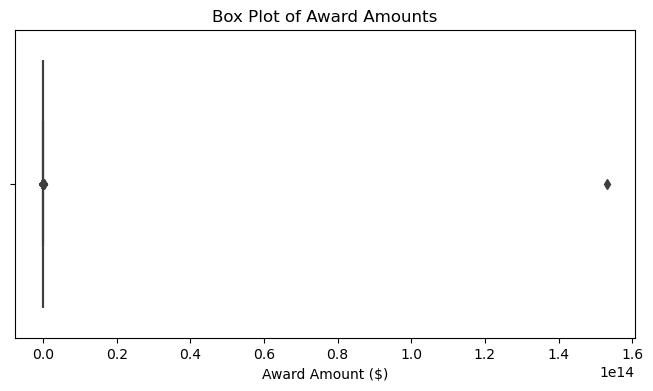

In [20]:
# Convert 'Award$' to numeric 
Combined_df['Award$'] = pd.to_numeric(Combined_df['Award$'], errors='coerce')

# Create a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=Combined_df['Award$'])
plt.title('Box Plot of Award Amounts')
plt.xlabel('Award Amount ($)')
plt.show()

In [21]:
median_award = Combined_df['Award$'].median()
Combined_df['Award$'].fillna(median_award, inplace=True)

#### Handling missing values in Title
- We will be filling missing values with a placeholder 'Unknown' in order to handle missing values.

In [22]:
Combined_df['Title'].fillna('Unknown', inplace=True)

#### Handling missing values in Sol#
- We will be filling missing values with a placeholder 'Unknown' in order to handle missing values.

In [23]:
Combined_df['Sol#'].fillna('Unknown', inplace=True)

#### Handling missing values in CGAC
- We will be filling missing values with a specific value 0 as it is of numeric datatype.

In [24]:
Combined_df['CGAC'].fillna(0, inplace=True)

#### Handling missing values in Sub-Tier
- We will be filling this data with a placeholder 'Unknown' in order to handle missing values.

In [25]:
Combined_df['Sub-Tier'].fillna('Unknown', inplace=True)

#### Handling missing values in FPDS Code
- Since FPDS Code has a limited number of distinct codes we will be handling the missing values by filling it with mode.

In [26]:
total_unique_fpds_codes = Combined_df['FPDS Code'].nunique()
print("Total number of unique values in FPDS Code:", total_unique_fpds_codes)

Total number of unique values in FPDS Code: 228


In [27]:
#The .mode() function returns a pandas series containing the mode(s) of the specified column. In this case, [0] is used to access the first mode in case there are multiple modes.
mode_of_FPDS_Code = Combined_df['FPDS Code'].mode()[0]
Combined_df['FPDS Code'].fillna(mode_of_FPDS_Code, inplace=True)

#### Handling Nan values in Office column
- We will be filling this data with a placeholder 'Unknown' in order to handle missing values.

In [28]:
Combined_df['Office'].fillna('Unknown', inplace=True)

#### Handling Nan values in AAC Code column
- We will be filling this data with the most 'most_frequent' strategy

In [29]:
#The .mode() function returns a pandas series containing the mode(s) of the specified column. In this case, [0] is used to access the first mode in case there are multiple modes.
mode_of_AAC_Code = Combined_df['AAC Code'].mode()[0]
Combined_df['AAC Code'].fillna(mode_of_AAC_Code, inplace=True)


#### Dropping the columns that are having high missing values

In [30]:
Combined_df.drop(columns=['PrimaryContactEmail','PrimaryContactFax','PrimaryContactPhone','PrimaryContactFullname','SecondaryContactFullname','SecondaryContactTitle','SecondaryContactEmail','SecondaryContactPhone','SecondaryContactFax','AdditionalInfoLink'], axis=1,inplace = True)

#### Handling missing values PopStreetAddress
- We will be filling this data with a placeholder 'Unknown' in order to handle missing values.

In [31]:
Combined_df['PopStreetAddress'].fillna('Unknown', inplace=True)

#### Handling missing values in ArchiveDate
 - Since we have few outliers we will be filling the missing values with median. 

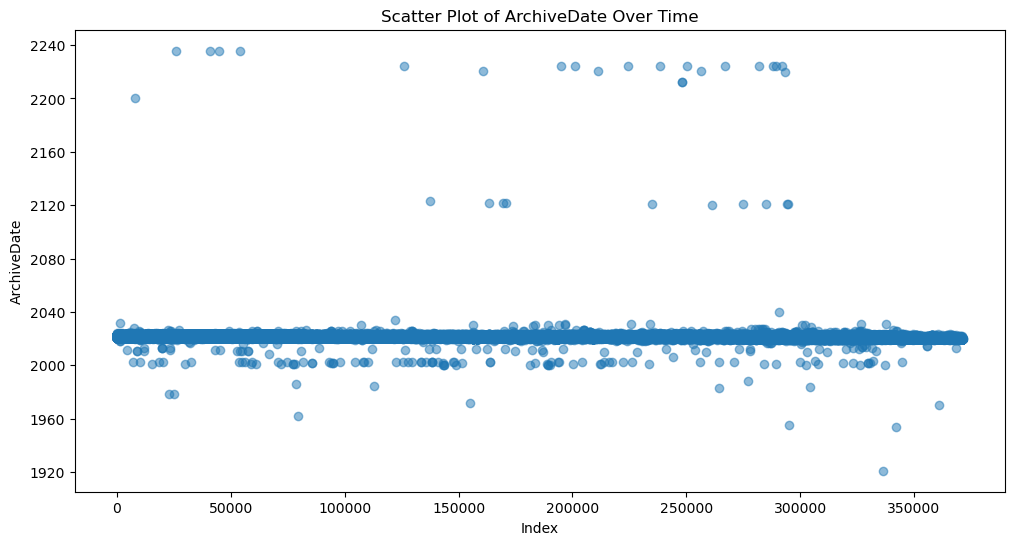

In [32]:
# Convert 'ArchiveDate' to datetime
Combined_df['ArchiveDate'] = pd.to_datetime(Combined_df['ArchiveDate'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.scatter(Combined_df.index, Combined_df['ArchiveDate'], marker='o', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('ArchiveDate')
plt.title('Scatter Plot of ArchiveDate Over Time')
plt.show()


In [33]:
# Calculate the median of non-missing dates
median_archive_date = Combined_df['ArchiveDate'].median()

# Fill in the missing values with the median date
Combined_df['ArchiveDate'].fillna(median_archive_date, inplace=True)

#### Handling missing values in ResponseDeadLine
- We will be filling this data with a placeholder 'Unknown' in order to handle missing values.

In [34]:
Combined_df['ResponseDeadLine'].fillna('Unknown', inplace=True)

#### Filling the missing values in SetASideCode
- We will be filling the missing values by mode. 

In [35]:
mode_of_SetASideCode = Combined_df['SetASideCode'].mode()[0] #The .mode() function returns a pandas series containing the mode(s) of the specified column. In this case, [0] is used to access the first mode in case there are multiple modes.
Combined_df['SetASideCode'].fillna(mode_of_SetASideCode, inplace=True) #The .fillna() method is used for filling missing (NaN) values in the specified column. The inplace=True parameter means that the changes are made directly to the dataframe.

#### Filling the missing values in SetASide  
- We will be filling the missing values by mode. 

In [36]:
mode_of_SetASide = Combined_df['SetASide'].mode()[0] #The .mode() function returns a pandas series containing the mode(s) of the specified column. In this case, [0] is used to access the first mode in case there are multiple modes.
Combined_df['SetASide'].fillna(mode_of_SetASide, inplace=True) #The .fillna() method is used for filling missing (NaN) values in the specified column. The inplace=True parameter means that the changes are made directly to the dataframe.

#### Handling missing values in NaicsCode
- We will be filling missing values with a specific value 0.

In [37]:
Combined_df['NaicsCode'].fillna(0, inplace=True)

#### Handling missing values in ClassificationCode
- We will be filling missing values with mode.

In [38]:
Combined_df['ClassificationCode'].nunique()

2466

In [39]:
mode_of_ClassificationCode = Combined_df['ClassificationCode'].mode()[0] #The .mode() function returns a pandas series containing the mode(s) of the specified column. In this case, [0] is used to access the first mode in case there are multiple modes.
Combined_df['ClassificationCode'].fillna(mode_of_ClassificationCode, inplace=True) #The .fillna() method is used for filling missing (NaN) values in the specified column. The inplace=True parameter means that the changes are made directly to the dataframe.

#### Handling missing values in AwardNumber
- We will be filling this data with a placeholder 'Unknown' in order to handle missing values.

In [40]:
Combined_df['AwardNumber'].unique() 

array(['W50S9C20P0026', '19AQMM20P2326', '19AQMM20P2312', ...,
       'FA462121P0062', '12505B21P0269', '12505B21P0267'], dtype=object)

In [41]:
Combined_df['AwardNumber'].fillna('Unknown', inplace=True)

#### Handling missing values in AwardDate
- We will be filling this data with a placeholder 'Unknown' in order to handle missing values.

In [42]:
Combined_df['AwardDate'].fillna('Unknown', inplace=True)

#### Handling missing values in PrimaryContactTitle
- We will be filling missing values with mode.

In [43]:
mode_of_PrimaryContactTitle = Combined_df['PrimaryContactTitle'].mode()[0] #The .mode() function returns a pandas series containing the mode(s) of the specified column. In this case, [0] is used to access the first mode in case there are multiple modes.
Combined_df['PrimaryContactTitle'].fillna(mode_of_PrimaryContactTitle, inplace=True) #The .fillna() method is used for filling missing (NaN) values in the specified column. The inplace=True parameter means that the changes are made directly to the dataframe.

### 6 Exploratory Data Analysis

### 6.1 Opportunity Distribution of Top 10 Departments/Agencies.

In [44]:
# Calculating the count of unique values in the 'Department/Ind.Agency' column
department_counts = Combined_df['Department/Ind.Agency'].value_counts()

In [45]:
# Choose the top 10 departments to display
top_n = 10
top_department_counts = department_counts.head(top_n)

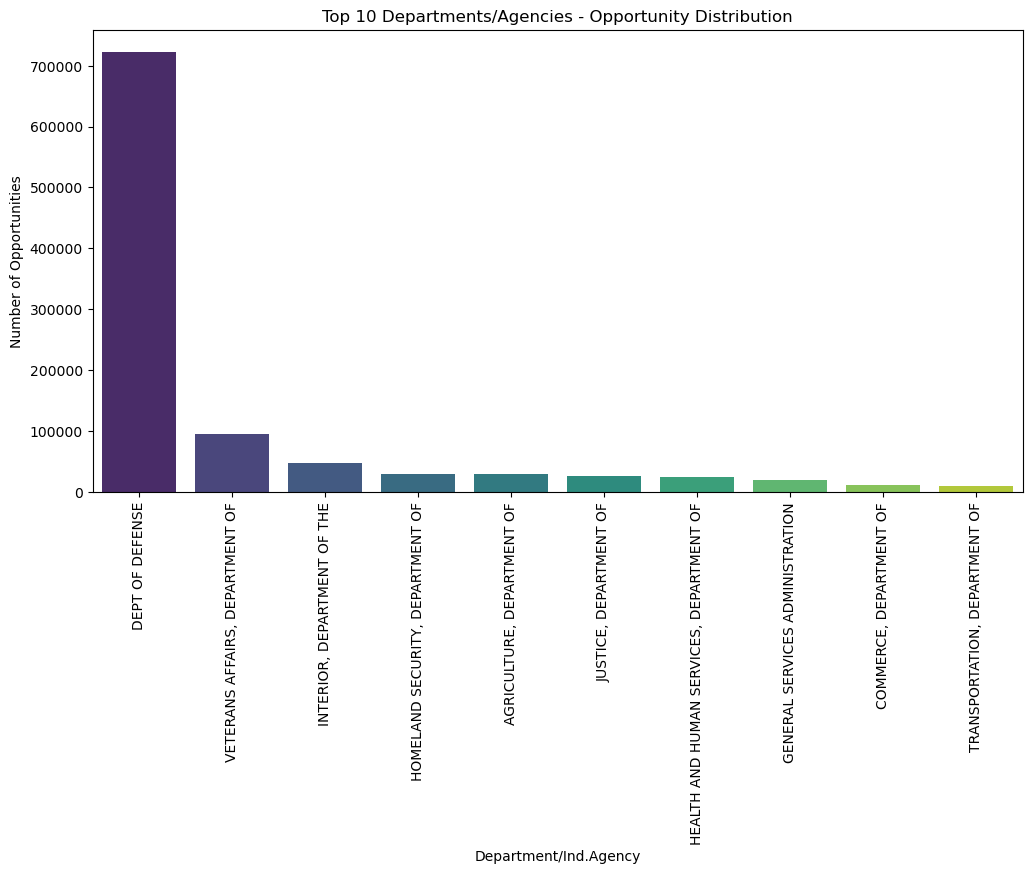

In [46]:
# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=top_department_counts.index, y=top_department_counts.values, palette='viridis')
    
plt.xticks(rotation=90)
plt.xlabel('Department/Ind.Agency')
plt.ylabel('Number of Opportunities')
plt.title(f'Top {top_n} Departments/Agencies - Opportunity Distribution')
plt.show()

In [47]:
# Display the top opportunity distributions
print(top_department_counts)

Department/Ind.Agency
DEPT OF DEFENSE                             722472
VETERANS AFFAIRS, DEPARTMENT OF              95232
INTERIOR, DEPARTMENT OF THE                  47680
HOMELAND SECURITY, DEPARTMENT OF             30263
AGRICULTURE, DEPARTMENT OF                   28983
JUSTICE, DEPARTMENT OF                       26629
HEALTH AND HUMAN SERVICES, DEPARTMENT OF     24903
GENERAL SERVICES ADMINISTRATION              19834
COMMERCE, DEPARTMENT OF                      11417
TRANSPORTATION, DEPARTMENT OF                 9951
Name: count, dtype: int64


#### Observations:
1. Highest number of opportunities are for department of defense - 72,2472.
2. The bar graph depicts a decreasing trend in the distribution of opportunities among various departments/agencies.

### 6.2 Top Awardees: Distribution of Number of Awards among Top Companies

In [48]:
# Exclude 'Unknown' values from the 'Company_Name' column
filtered_data = company_name_df[company_name_df['Company_Name'] != 'Unknown']

In [49]:
# Identify the top awardees (company names)
top_awardees = filtered_data['Company_Name'].value_counts().nlargest(5)  #Using nlargest to get top 5 awardees.

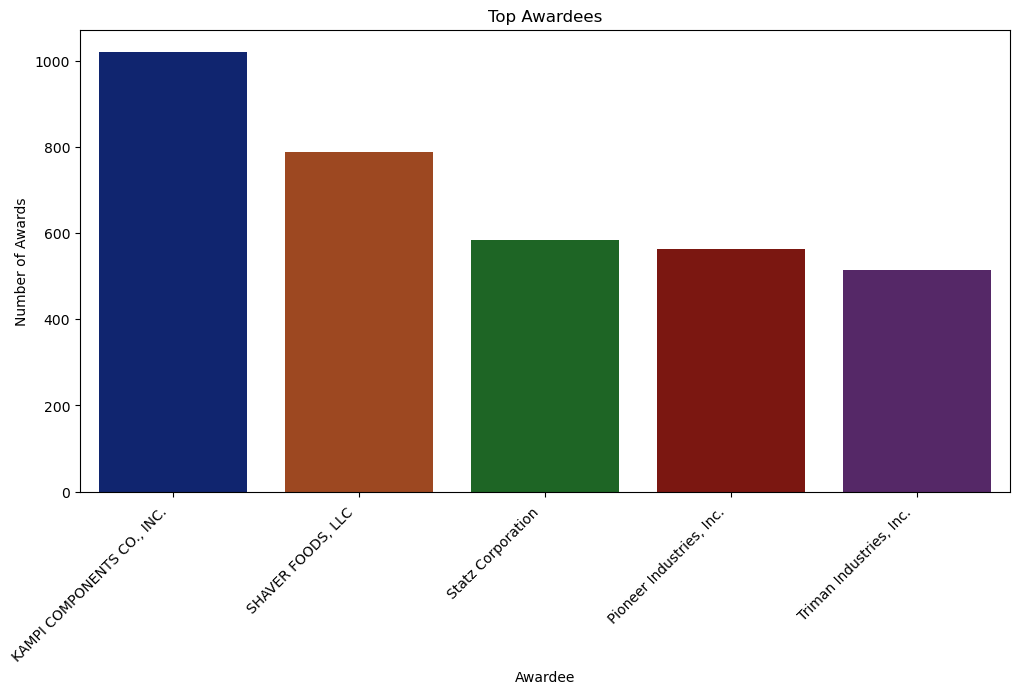

In [50]:
# Visualize the top awardees
plt.figure(figsize=(12, 6))
sns.barplot(x=top_awardees.index, y=top_awardees.values, palette='dark')
plt.title('Top Awardees')
plt.xlabel('Awardee')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45, ha='right')
plt.show()

In [51]:
# Display the top awardees
print(top_awardees)

Company_Name
KAMPI COMPONENTS CO., INC.     1021
SHAVER FOODS, LLC               789
Statz Corporation               584
Pioneer Industries, Inc.        562
Triman Industries, Inc.         515
Name: count, dtype: int64


#### Observations:
1. Most awards are achieved by KAMPI COMPONENTS CO., INC. company - 1,021.
2. As we move from left to right along the x-axis, the bars gradually decline, indicating a reduction in the frequency of awards for each corresponding company.

### 6.3 Distribution of Posted Opportunities

In [52]:
Combined_df['PostedDate']

0         2020-09-30 23:57:23.594-04
1         2020-09-30 23:53:02.228-04
2         2020-09-30 23:48:57.306-04
3         2020-09-30 23:45:27.966-04
4         2020-09-30 23:43:15.213-04
                     ...            
341587    2021-10-01 01:10:15.569-04
341588    2021-10-01 00:20:35.287-04
341589    2021-10-01 00:12:23.278-04
341590    2021-10-01 00:03:51.008-04
341591    2021-10-01 00:00:54.533-04
Name: PostedDate, Length: 1063895, dtype: object

In [53]:
Combined_df['PostedDate'] = pd.to_datetime(Combined_df['PostedDate'].str[:-4], format='ISO8601', utc=True)


In [54]:
# Extract year, month, and week from 'PostedDate'
Combined_df['Year'] = Combined_df['PostedDate'].dt.year
Combined_df['Month'] = Combined_df['PostedDate'].dt.month

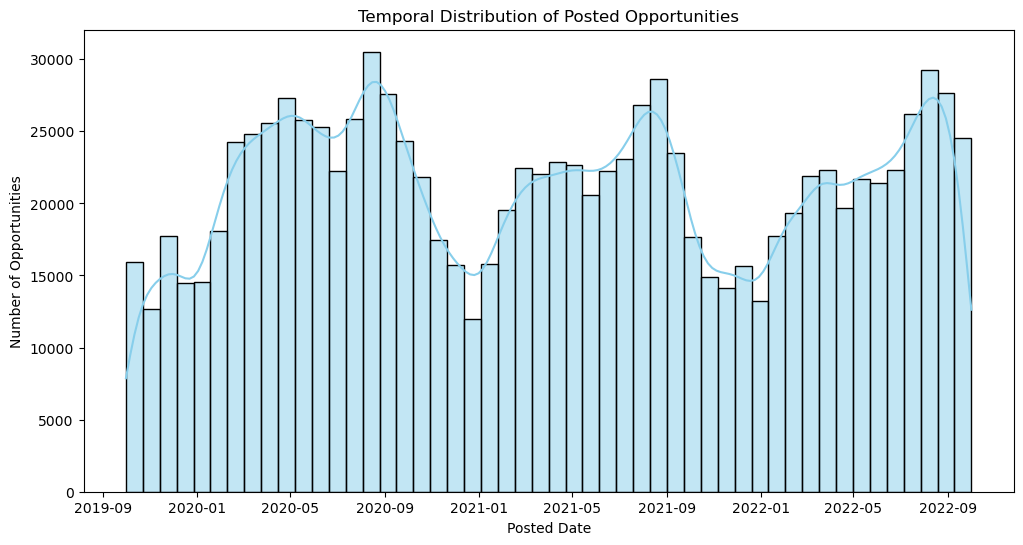

In [55]:
# Plot the overall temporal distribution
plt.figure(figsize=(12, 6))
sns.histplot(Combined_df['PostedDate'], bins=50, kde=True, color='skyblue')
plt.title('Temporal Distribution of Posted Opportunities')
plt.xlabel('Posted Date')
plt.ylabel('Number of Opportunities')
plt.show()

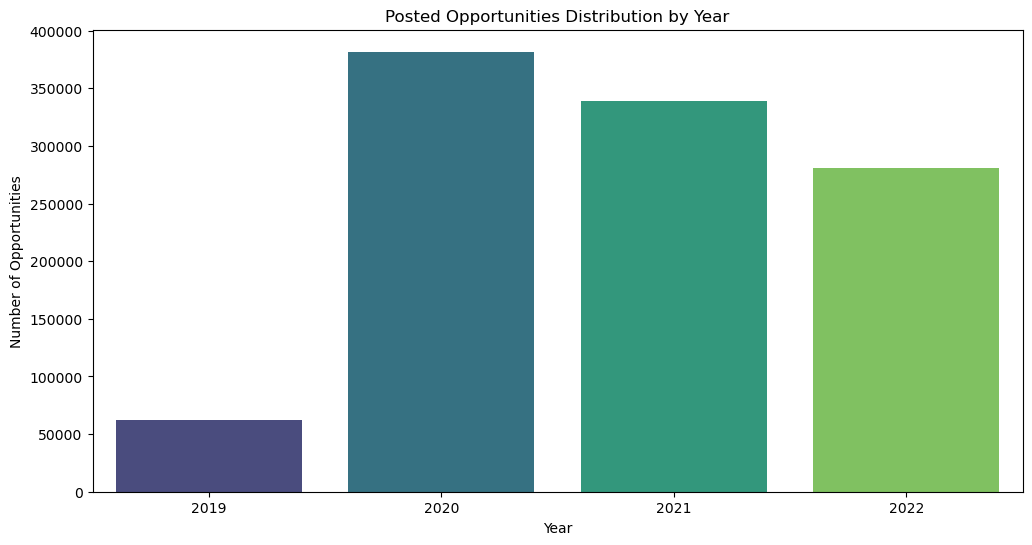

In [56]:
# Plot the distribution by years
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=Combined_df, palette='viridis')
plt.title('Posted Opportunities Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Opportunities')
plt.show()

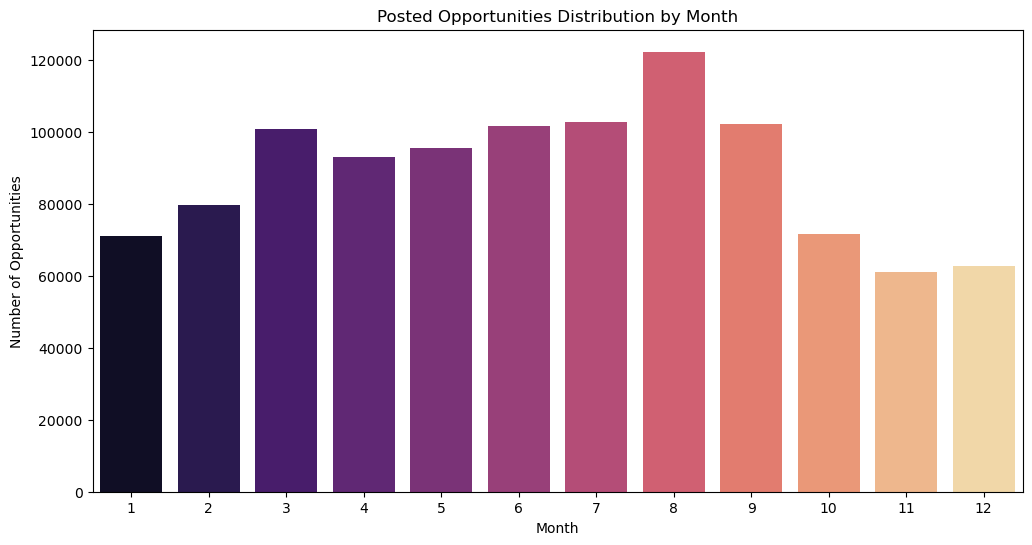

In [57]:
# Plot the distribution by months
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=Combined_df, palette='magma')
plt.title('Posted Opportunities Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Opportunities')
plt.show()

#### Observations:
1. Starting from September 2019, there is an upward trend in the number of opportunities posted which peaks around the start of 2020. 
2. Highest number of opportunities were posted in year 2020.
3. Opportunity distribution by month was highest in August. 

### Hypothesis 1: Award Amount Trends Over the Years
    
Null Hypothesis (H0): There is no significant change in the average award amount over the years.

Alternate Hypothesis (H1): There is a significant change in the average award amount over the years.

In [58]:
# Remove rows with 'Unknown' values in 'AwardDate'
Combined_df = Combined_df[Combined_df['AwardDate'] != 'Unknown']

In [59]:
# Convert 'AwardDate' to datetime
Combined_df['AwardDate'] = pd.to_datetime(Combined_df['AwardDate'], errors='coerce')

In [60]:
# Extract the year from 'AwardDate'
Combined_df['AwardYear'] = Combined_df['AwardDate'].dt.year

In [61]:
# Group by 'AwardYear' and calculate the average award amount
average_award_by_year = Combined_df.groupby('AwardYear')['Award$'].mean().reset_index()

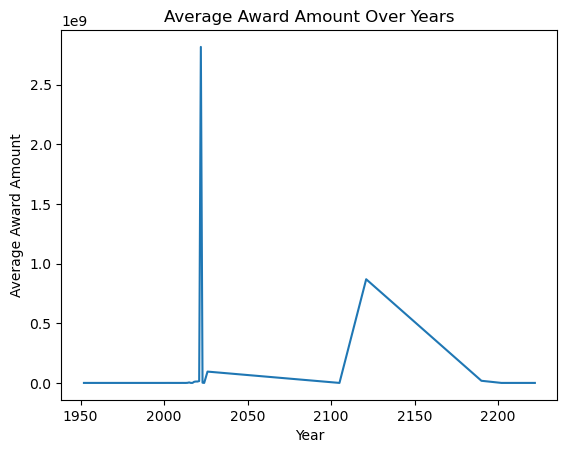

In [62]:
# Assuming average_award_by_year is a pandas DataFrame
plt.plot(average_award_by_year['AwardYear'], average_award_by_year['Award$'])
plt.title('Average Award Amount Over Years')
plt.xlabel('Year')
plt.ylabel('Average Award Amount')
plt.show()


In [63]:
# Get the current year from the system date
current_year = datetime.now().year

In [64]:
# Select a subset of the 'average_award_by_year' DataFrame based on a condition
# Filter rows where 'AwardYear' is within the range from 8 years ago to 3 years into the future
selected_years_data = average_award_by_year[average_award_by_year['AwardYear'].between(current_year - 8, current_year + 3)]

# Create a copy of the selected subset to avoid the SettingWithCopyWarning
# This ensures that 'past_years_data' is an independent copy of the original DataFrame
# and modifications to 'past_years_data' won't affect the original DataFrame
past_years_data = selected_years_data.copy()

In [65]:
# Convert 'AwardYear' to integers
past_years_data.loc[:, 'AwardYear'] = past_years_data['AwardYear'].astype(int)

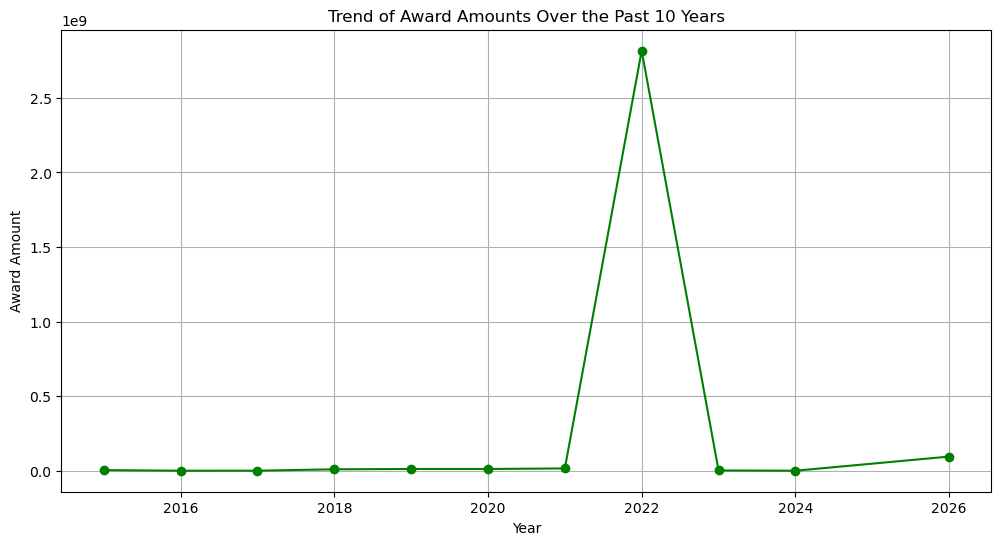

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(past_years_data['AwardYear'], past_years_data['Award$'], marker='o', color='green', linestyle='-')
plt.title('Trend of Award Amounts Over the Past 10 Years')
plt.xlabel('Year')
plt.ylabel('Award Amount')
plt.grid(True)
plt.show()

In [67]:
# Check if there are data points for each year
print(Combined_df['AwardYear'].value_counts())

AwardYear
2020.0    77554
2021.0    65675
2022.0    54700
2019.0    16403
2018.0      203
2017.0      149
2016.0      109
2015.0      103
2014.0       44
2023.0       19
2013.0       12
2009.0        9
2012.0        9
2011.0        8
2002.0        5
2001.0        4
2008.0        4
2005.0        3
2202.0        2
2222.0        2
2007.0        1
2190.0        1
1999.0        1
2026.0        1
2210.0        1
2010.0        1
2000.0        1
2024.0        1
2121.0        1
1952.0        1
2105.0        1
2211.0        1
Name: count, dtype: int64


In [68]:
# Perform one-way ANOVA on the 'Award$' values across different years (AwardYear) using the f_oneway function.
# The data is grouped by 'AwardYear' using the groupby method, and a list comprehension is used to extract the 'Award$' values for each year.
# The asterisk (*) before the list unpacks the list of 'Award$' values from each group, passing them as separate arguments to f_oneway.
# The result contains the F-statistic and p-value, indicating whether there are statistically significant differences in 'Award$' means across the years.
result = f_oneway(*[group['Award$'] for name, group in Combined_df.groupby('AwardYear')])
print("ANOVA p-value:", result.pvalue)

ANOVA p-value: 0.9999999999808635


In [69]:
# Set your significance level (alpha)
alpha = 0.05

# Interpret the results
if result.pvalue < alpha:
    print(f"The p-value ({result.pvalue:.4f}) is less than the significance level ({alpha}).")
    print("Reject the null hypothesis.")
    print("There is sufficient evidence to conclude that there is a significant difference in average award amounts across years.")
else:
    print(f"The p-value ({result.pvalue:.4f}) is greater than the significance level ({alpha}).")
    print("Fail to reject the null hypothesis.")
    print("There is insufficient evidence to conclude a significant difference in average award amounts across years.")

The p-value (1.0000) is greater than the significance level (0.05).
Fail to reject the null hypothesis.
There is insufficient evidence to conclude a significant difference in average award amounts across years.


#### Observations: 
1. There is a notable spike in the average award amount for the year 2022. 
2. This is an anomaly compared to other years and could indicate a significant increase for that year.
3. In ANOVA statistical testing, p-value is 1 greater than alpha which is failing to reject null hypothesis.

### Hypothesis 2:There is an increase in number of contract posted for Department of Commerce over the last several years


Null Hypothesis (H0): There is no increase in the number of contracts posted for the Department of Commerce over the last several years.

Alternate Hypothesis (H1): There is an increase in the number of contracts posted for the Department of Commerce over the last several years.

In [70]:
# Round the 'Year' to the nearest whole number and convert to integers
Combined_df['Year'] = Combined_df['PostedDate'].dt.year.round().astype(int)

In [71]:
# Aggregate data by month
grouped_data = Combined_df.groupby([pd.Grouper(key='PostedDate', freq='M'), 'Department/Ind.Agency']).size().reset_index(name='ContractCount')

In [72]:
# Filter for Department of Commerce
commerce_data = grouped_data[grouped_data['Department/Ind.Agency'] == 'COMMERCE, DEPARTMENT OF']

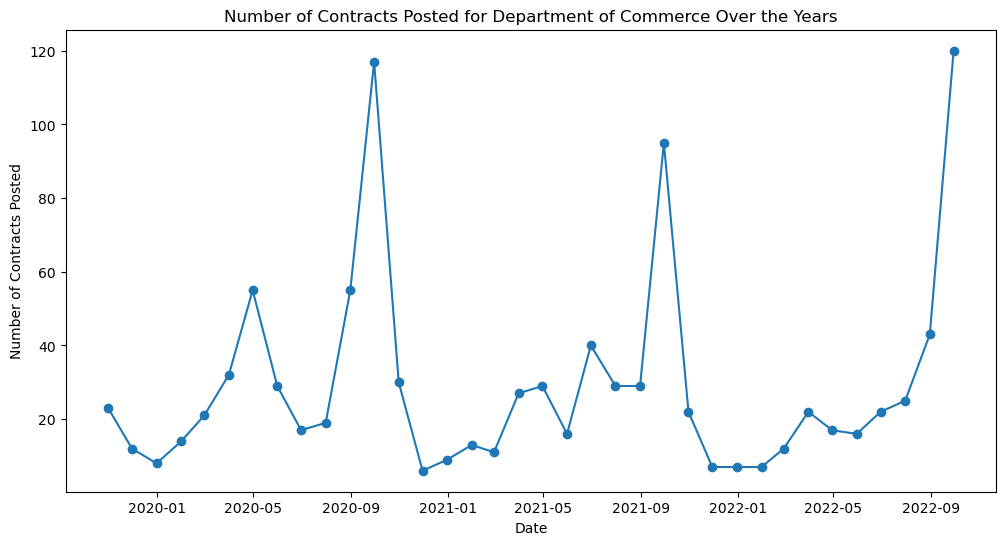

In [73]:
# Plot the data using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(commerce_data['PostedDate'], commerce_data['ContractCount'], marker='o')
plt.title('Number of Contracts Posted for Department of Commerce Over the Years')
plt.xlabel('Date')
plt.ylabel('Number of Contracts Posted')

plt.show()

#### Observations:
1. There is a clear upward trend in the number of contracts posted towards the end of the period shown, particularly with a sharp increase by September 2022. 
2. This suggests that the Alternate Hypothesis (H1) stating there is an increase in the number of contracts posted for the Department of Commerce over the last several years is true until September 2022. 

### Hypothesis 3: Census Bureau has the largest dollar amount of contract in Department of Commerce

Null Hypothesis (H0): The dollar amount of contracts awarded to the Census Bureau is not larger than that of other sub-agencies within the Department of Commerce.
 
Alternate Hypothesis (H1): The dollar amount of contracts awarded to the Census Bureau is larger than that of other sub-agencies within the Department of Commerce.


In [74]:
# Filter data for the Department of Commerce
dept_commerce_data = Combined_df[Combined_df['Department/Ind.Agency'] == 'COMMERCE, DEPARTMENT OF']

In [75]:
# Aggregate data to calculate total dollar amount for each sub-tier
subtier_agg = dept_commerce_data.groupby('Sub-Tier')['Award$'].sum().reset_index()

In [76]:
# Sort the data by total dollar amount in descending order
subtier_agg = subtier_agg.sort_values(by='Award$', ascending=False)

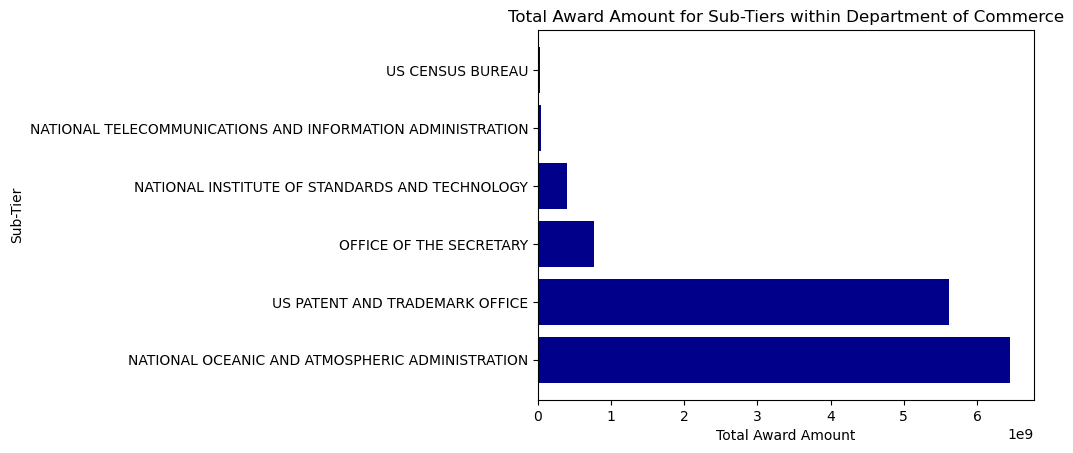

In [77]:
# Creating a normal (non-interactive) horizontal bar plot using matplotlib
plt.barh(subtier_agg['Sub-Tier'], subtier_agg['Award$'], color='darkblue')

# Customize plot labels and title
plt.xlabel('Total Award Amount')
plt.ylabel('Sub-Tier')
plt.title('Total Award Amount for Sub-Tiers within Department of Commerce')

# Show the static plot
plt.show()

#### Observations:
1. The US Census Bureau is represented with the smallest bar on the chart, indicating that it has received a lower total dollar amount of contracts compared to the other sub-agencies listed.
2. Based on the visual evidence from the bar chart, the Null Hypothesis (H0) stating that "The dollar amount of contracts awarded to the Census Bureau is not larger than that of other sub-agencies within the Department of Commerce" is supported.